In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv('cleaned_cyber_vulnerabilities.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   cveID                       1394 non-null   object
 1   vendorProject               1394 non-null   object
 2   product                     1394 non-null   object
 3   vulnerabilityName           1394 non-null   object
 4   dateAdded                   1394 non-null   object
 5   shortDescription            1394 non-null   object
 6   requiredAction              1394 non-null   object
 7   dueDate                     1394 non-null   object
 8   knownRansomwareCampaignUse  1394 non-null   object
 9   notes                       1394 non-null   object
 10  cwes                        1245 non-null   object
 11  year_added                  1394 non-null   int64 
 12  month_added                 1394 non-null   int64 
 13  days_since_added            1394 non-null   int6

In [56]:
df.nunique()

cveID                         1394
vendorProject                  228
product                        566
vulnerabilityName             1084
dateAdded                      320
shortDescription              1310
requiredAction                  38
dueDate                        340
knownRansomwareCampaignUse       2
notes                         1394
cwes                           204
year_added                       5
month_added                     12
days_since_added               320
dtype: int64

In [58]:
df['dateAdded'] = pd.to_datetime(df['dateAdded'], errors='coerce')
#df['dateUpdated'] = pd.to_datetime(df['dateUpdated'], errors='coerce')
df['dueDate'] = pd.to_datetime(df['dueDate'], errors='coerce')

In [60]:
df['year'] = df['dateAdded'].dt.year
df['month'] = df['dateAdded'].dt.month
df['year_month'] = df['dateAdded'].dt.to_period('M')


In [61]:
#Top Vendors with Most Vulnerabilities

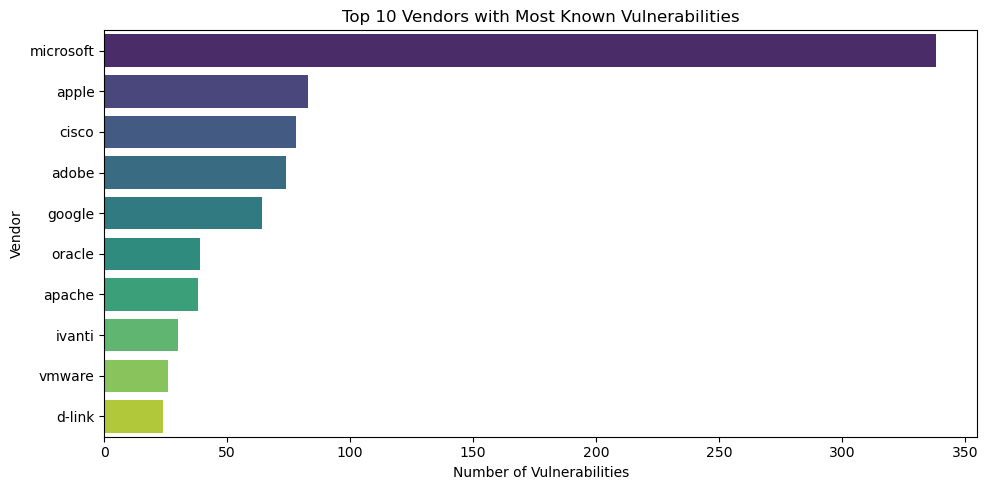

In [62]:
top_vendors = df['vendorProject'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="viridis")
plt.title("Top 10 Vendors with Most Known Vulnerabilities")
plt.xlabel("Number of Vulnerabilities")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()

In [63]:
#Vulnerabilities Over Time (Trend Analysis)

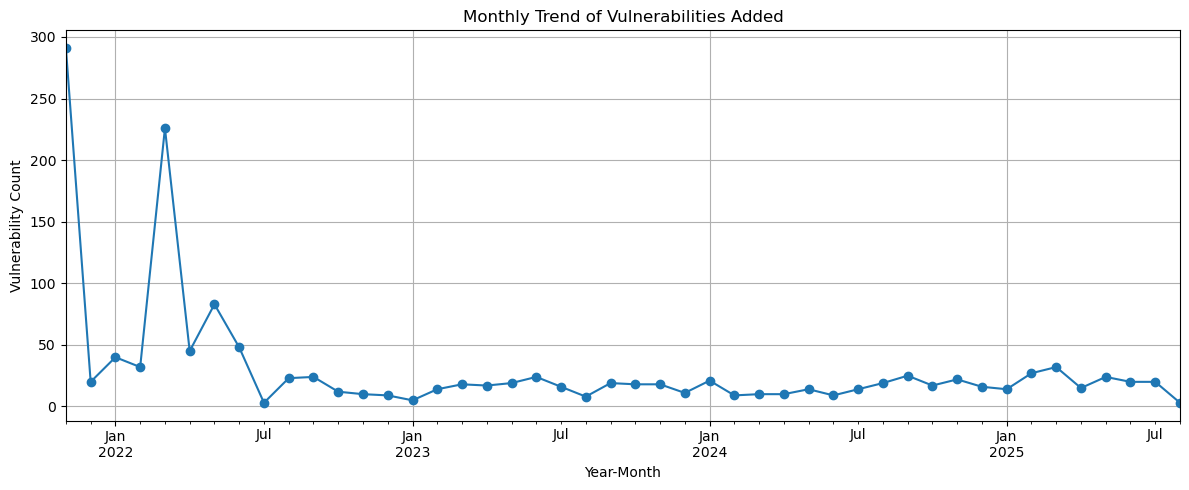

In [64]:
trend = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12,5))
trend.plot(kind='line', marker='o')
plt.title("Monthly Trend of Vulnerabilities Added")
plt.xlabel("Year-Month")
plt.ylabel("Vulnerability Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
#Most Common Vulnerability Names

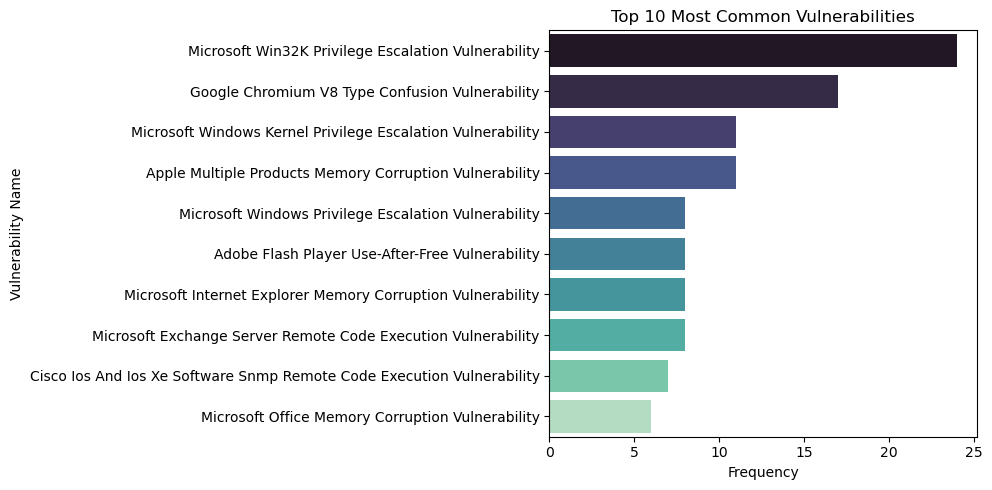

In [66]:
top_vuln_names = df['vulnerabilityName'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_vuln_names.values, y=top_vuln_names.index, palette="mako")
plt.title("Top 10 Most Common Vulnerabilities")
plt.xlabel("Frequency")
plt.ylabel("Vulnerability Name")
plt.tight_layout()
plt.show()

In [67]:
#Time to Respond (Due Date vs Added Date)

C:\Users\Lokendra\anaconda3\anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


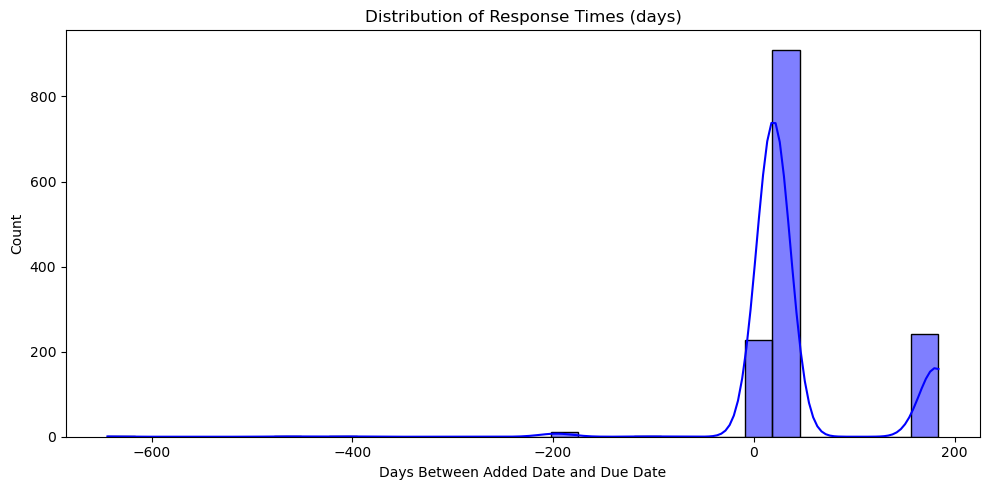

In [69]:
df['response_days'] = (df['dueDate'] - df['dateAdded']).dt.days

# Remove outliers and nulls
response_times = df['response_days'].dropna()
response_times = response_times[response_times < 365]  # filter to within 1 year

plt.figure(figsize=(10,5))
sns.histplot(response_times, bins=30, kde=True, color='blue')
plt.title("Distribution of Response Times (days)")
plt.xlabel("Days Between Added Date and Due Date")
plt.tight_layout()
plt.show()

In [70]:
#Summary Statistics

In [71]:
summary = {
    "Total Records": len(df),
    "Unique Vendors": df['vendorProject'].nunique(),
    "Earliest Entry": df['dateAdded'].min(),
    "Latest Entry": df['dateAdded'].max(),
    "Most Common Vulnerability": df['vulnerabilityName'].value_counts().idxmax(),
    "Average Response Days": df['response_days'].mean()
}

for k, v in summary.items():
    print(f"{k}: {v}")


Total Records: 1394
Unique Vendors: 228
Earliest Entry: 2021-11-03 00:00:00
Latest Entry: 2025-08-05 00:00:00
Most Common Vulnerability: Microsoft Win32K Privilege Escalation Vulnerability
Average Response Days: 44.59827833572454


In [72]:
df.sort_values(by="dateAdded", ascending=False).head(100).to_csv("recent_100_vulnerabilities.csv", index=False)